In [1]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\santh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\santh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\santh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\santh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\santh\AppData\Roaming\nltk_data...
[nltk_data]    | 

[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     C:\Users\santh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package mwa_ppdb to
[nltk_data]    |     C:\Users\santh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | Downloading package names to
[nltk_data]    |     C:\Users\santh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Downloading package nombank.1.0 to
[nltk_data]    |     C:\Users\santh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nombank.1.0 is already up-to-date!
[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\santh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nonbreaking_prefixes is already up-to-date!
[nltk_data]    | Downloading package nps_chat

[nltk_data]    |   Package twitter_samples is already up-to-date!
[nltk_data]    | Downloading package udhr to
[nltk_data]    |     C:\Users\santh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr is already up-to-date!
[nltk_data]    | Downloading package udhr2 to
[nltk_data]    |     C:\Users\santh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr2 is already up-to-date!
[nltk_data]    | Downloading package unicode_samples to
[nltk_data]    |     C:\Users\santh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package unicode_samples is already up-to-date!
[nltk_data]    | Downloading package universal_tagset to
[nltk_data]    |     C:\Users\santh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package universal_tagset is already up-to-date!
[nltk_data]    | Downloading package universal_treebanks_v20 to
[nltk_data]    |     C:\Users\santh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package universal_treebanks_v20 is already up-to-
[nltk_data]    |       date!

True

In [2]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [3]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline
import warnings
warnings.filterwarnings("ignore")


UsageError: Line magic function `%` not found.


In [4]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\santh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\santh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\santh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
# Load datasets
df_real = pd.read_csv(r'C:\Users\santh\Desktop\News\true.csv') # The True News Dataset
df_real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
df_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [7]:
df_real.shape

(21417, 4)

In [8]:
df_real.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [9]:
df_fake= pd.read_csv(r'C:\Users\santh\Desktop\News\fake.csv') # The Fake News Dataset
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [10]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [11]:
df_fake.shape

(23481, 4)

In [12]:
df_fake.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [13]:
df_real.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [14]:
df_fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [15]:
df_real.duplicated().sum()

206

In [16]:
df_real.drop_duplicates(inplace=True) #Dropping the Duplicate values

In [17]:
df_fake.duplicated().sum()

3

In [18]:
df_fake.drop_duplicates(inplace=True)

In [19]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23478 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23478 non-null  object
 1   text     23478 non-null  object
 2   subject  23478 non-null  object
 3   date     23478 non-null  object
dtypes: object(4)
memory usage: 917.1+ KB


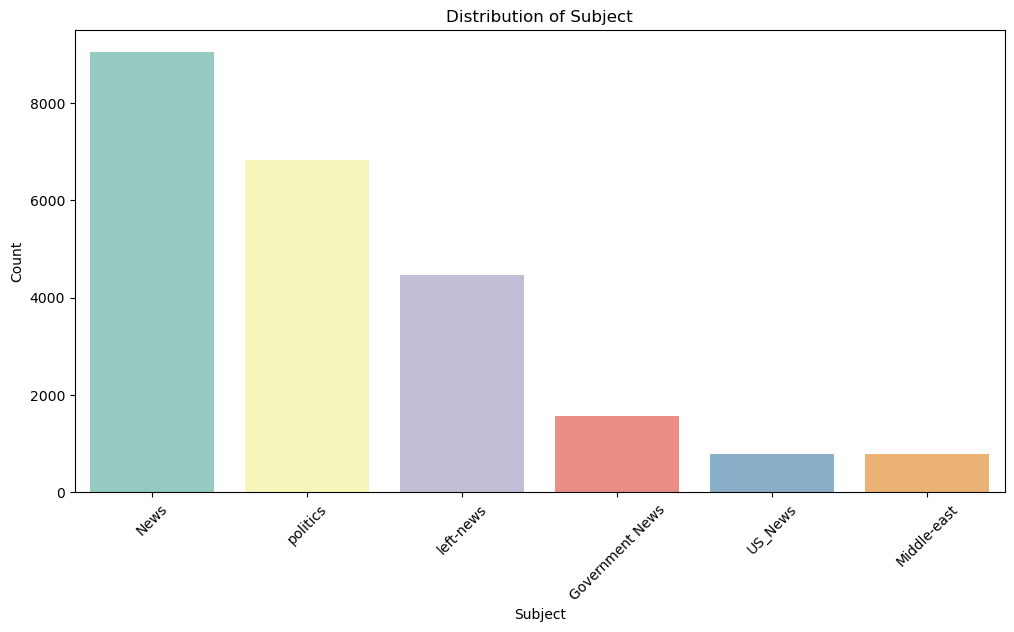

In [20]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.countplot(x='subject', data=df_fake, order=df_fake['subject'].value_counts().index, palette='Set3')
plt.title('Distribution of Subject')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
#Distribution of Subjects in Fake News Dataset

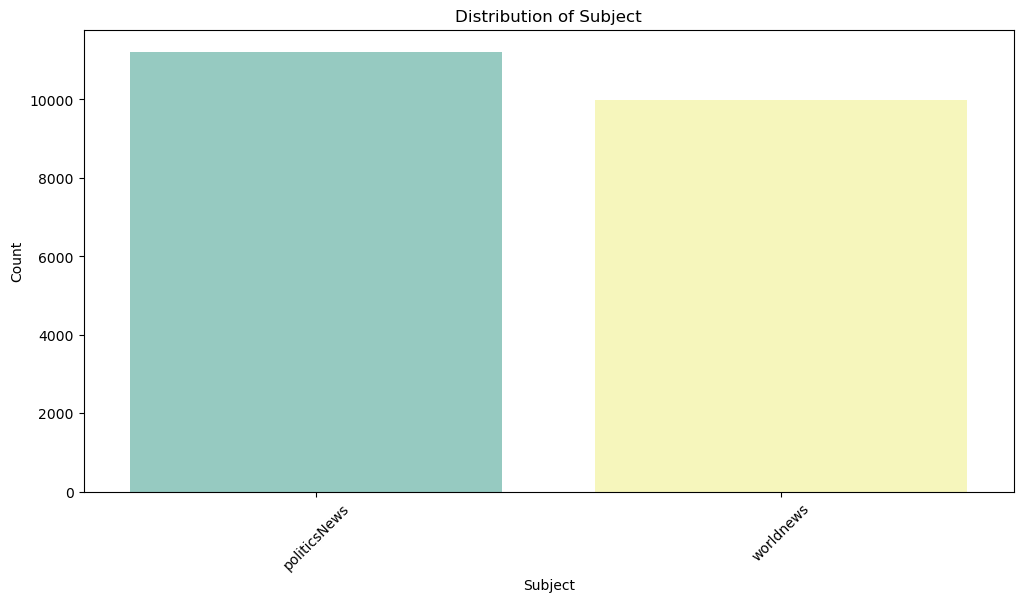

In [21]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.countplot(x='subject', data=df_real, order=df_real['subject'].value_counts().index, palette='Set3')
plt.title('Distribution of Subject')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
#Distribution of Subjects in True News Dataset

In [22]:
! pip install wordcloud

In [23]:
df_real['label'] = 1
df_fake['label'] = 0

In [24]:
df_fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [25]:
# Combine 'title' and 'text' columns into a new column 'News'
df_real['News'] = df_real['title'] + ' ' + df_real['text']
df_fake['News'] = df_fake['title'] + ' ' + df_fake['text']

In [28]:
# Step 1: Verify shapes of df_real and df_fake before concatenation
print("Shape of df_real:", df_real.shape)
print("Shape of df_fake:", df_fake.shape)

# Step 2: Concatenate df_real and df_fake to create df_combined
df_combined = pd.concat([df_real, df_fake], ignore_index=True)

# Reset the index of df_combined if necessary
df_combined.reset_index(drop=True, inplace=True)

# Convert label values: 0 for fake news and 1 for real news
df_combined['label'] = (df_combined['label'] == 1).astype(int)

# Check the first few rows to verify the label assignment
print(df_combined.head())


# Check the shape of df_combined
print("Shape of df_combined:", df_combined.shape)

# Step 3 (optional): Check for duplicated rows in df_combined
duplicated_rows = df_combined[df_combined.duplicated()]
if not duplicated_rows.empty:
    print("Duplicated rows found in df_combined:\n", duplicated_rows)
else:
    print("No duplicated rows found in df_combined.")


Shape of df_real: (21211, 6)
Shape of df_fake: (23478, 6)
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  label  \
0  December 31, 2017       1   
1  December 29, 2017       1   
2  December 31, 2017       1   
3  December 30, 2017       1   
4  December 29, 2017    

In [30]:
df_combined.tail()

,title,text,subject,date,label,News
44684,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0,McPain: John McCain Furious That Iran Treated ...
44685,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...
44686,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...
44687,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0,How to Blow $700 Million: Al Jazeera America F...
44688,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0,10 U.S. Navy Sailors Held by Iranian Military ...


In [31]:
df_combined.head()

,title,text,subject,date,label,News
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,Trump wants Postal Service to charge 'much mor...


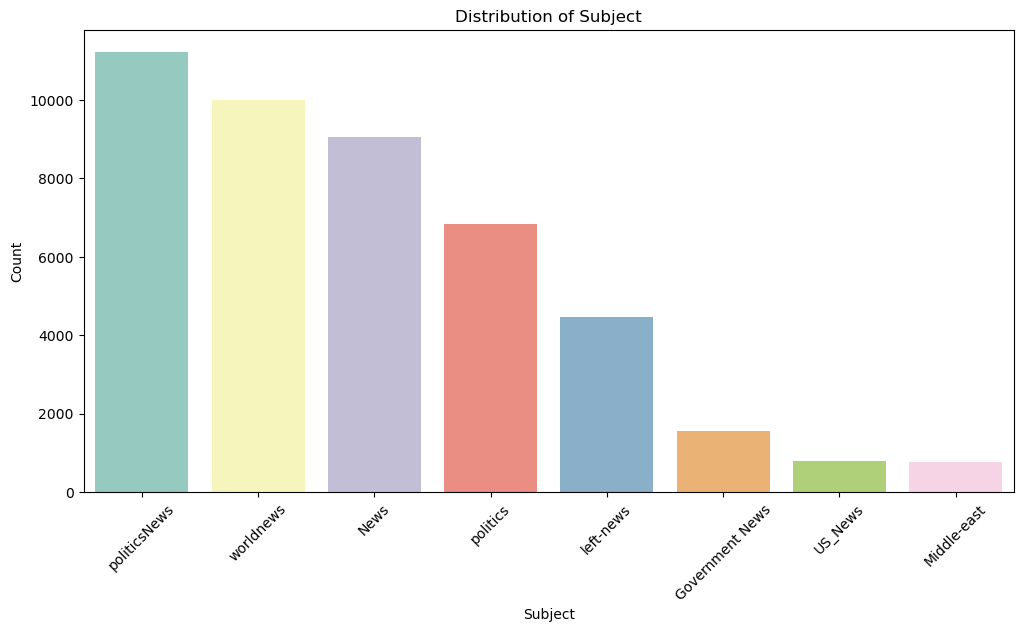

In [32]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.countplot(x='subject', data=df_combined, order=df_combined['subject'].value_counts().index, palette='Set3')
plt.title('Distribution of Subject')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
#Distribution of Subjects in Combined Dataset

In [33]:
# Drop the 'title', 'text', and 'date' columns
df_real.drop(columns=['title', 'text', 'date','subject'], inplace=True)
df_fake.drop(columns=['title', 'text', 'date','subject'], inplace=True)
df_combined.drop(columns=['title', 'text', 'date','subject'], inplace=True)

In [34]:
df_real.head()

,label,News
0,1,"As U.S. budget fight looms, Republicans flip t..."
1,1,U.S. military to accept transgender recruits o...
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,1,FBI Russia probe helped by Australian diplomat...
4,1,Trump wants Postal Service to charge 'much mor...


In [35]:
df_fake.head()

,label,News
0,0,Donald Trump Sends Out Embarrassing New Year’...
1,0,Drunk Bragging Trump Staffer Started Russian ...
2,0,Sheriff David Clarke Becomes An Internet Joke...
3,0,Trump Is So Obsessed He Even Has Obama’s Name...
4,0,Pope Francis Just Called Out Donald Trump Dur...


In [37]:
df_combined.head()

,label,News
0,1,"As U.S. budget fight looms, Republicans flip t..."
1,1,U.S. military to accept transgender recruits o...
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,1,FBI Russia probe helped by Australian diplomat...
4,1,Trump wants Postal Service to charge 'much mor...


In [38]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download WordNet if not already downloaded
nltk.download('wordnet')

# Initialize WordNet lemmatizer and get English stopwords
lemmatizer = WordNetLemmatizer()
stopwords = set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text) #Removes square brackets and their contents from the text.
    text = re.sub('https?://\S+|www\.\S+', '', text) # Remove URLs
    text = re.sub('<.*?>+', '', text)#Removes HTML tags from the text.
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)#Removes punctuation marks from the text.
    text = re.sub('\n', '', text) #Removes newline characters from the text.
    text = re.sub('\w*\d\w*', '', text)  # Remove digits
     # Remove remaining punctuation (excluding hyphens and apostrophes)
    text = re.sub(r'[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]', '', text)
    text = [word for word in text.split() if word not in stopwords]
    text = [lemmatizer.lemmatize(word) for word in text]
    text = " ".join(text)
    return text

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\santh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [39]:
# Apply preprocessing to the 'News' column in df_real,df_combined and df_fake
df_real['News'] = df_real['News'].apply(clean)

In [44]:
df_real.shape

(21211, 2)

In [41]:
df_fake['News'] = df_fake['News'].apply(clean)

In [45]:
df_fake.shape

(23478, 2)

In [47]:
df_combined['News'] = df_combined['News'].apply(clean)

In [52]:
df_combined.shape

(44689, 2)

In [48]:
df_combined.head()

,label,News
0,1,u budget fight loom republican flip fiscal scr...
1,1,u military accept transgender recruit monday p...
2,1,senior u republican senator let mr mueller job...
3,1,fbi russia probe helped australian diplomat ti...
4,1,trump want postal service charge much amazon s...


In [56]:
df_fake.head()

,label,News
0,0,donald trump sends embarrassing new year’s eve...
1,0,drunk bragging trump staffer started russian c...
2,0,sheriff david clarke becomes internet joke thr...
3,0,trump obsessed even obama’s name coded website...
4,0,pope francis called donald trump christmas spe...


In [50]:
df_real.head()

,label,News
0,1,u budget fight loom republican flip fiscal scr...
1,1,u military accept transgender recruit monday p...
2,1,senior u republican senator let mr mueller job...
3,1,fbi russia probe helped australian diplomat ti...
4,1,trump want postal service charge much amazon s...


In [54]:
df_combined.tail()

,label,News
44684,0,mcpain john mccain furious iran treated u sail...
44685,0,justice yahoo settle email privacy classaction...
44686,0,sunnistan u allied ‘safe zone’ plan take terri...
44687,0,blow million al jazeera america finally call q...
44688,0,u navy sailor held iranian military – sign neo...


In [59]:
from collections import Counter

# Tokenize the cleaned text
real_words = ' '.join(df_real['News']).split()
fake_words = ' '.join(df_fake['News']).split()
combined_words = ' '.join(df_combined['News']).split()

# Get the frequency of words
real_word_freq = Counter(real_words)
fake_word_freq = Counter(fake_words)
combined_word_freq = Counter(combined_words)

# Get top 100 words based on frequency
top_100_real_words = real_word_freq.most_common(100)
top_100_fake_words = fake_word_freq.most_common(100)
top_100_combined_words = combined_word_freq.most_common(100)


In [60]:
# Print the top 100 words in each dataset
print("Top 100 words in real news:")
print(top_100_real_words)


Top 100 words in real news:
[('said', 97837), ('trump', 47032), ('u', 44379), ('state', 34979), ('would', 31289), ('reuters', 28070), ('president', 25957), ('republican', 22599), ('government', 19109), ('year', 17998), ('house', 17971), ('new', 17425), ('also', 15746), ('united', 15391), ('official', 14850), ('people', 14580), ('election', 14173), ('told', 14111), ('party', 13967), ('could', 13704), ('country', 12923), ('say', 12887), ('one', 12602), ('last', 12528), ('washington', 12122), ('two', 11659), ('trump’s', 11514), ('group', 11016), ('campaign', 11008), ('leader', 10865), ('former', 10756), ('north', 10521), ('security', 10468), ('court', 10426), ('donald', 10279), ('white', 10188), ('week', 10134), ('percent', 9906), ('minister', 9848), ('tax', 9689), ('senate', 9613), ('vote', 9369), ('law', 9195), ('time', 8891), ('month', 8616), ('national', 8554), ('first', 8496), ('statement', 8491), ('clinton', 8412), ('foreign', 8353), ('democratic', 8339), ('china', 8287), ('since', 

In [61]:
print("\nTop 100 words in fake news:")
print(top_100_fake_words)



Top 100 words in fake news:
[('trump', 80652), ('said', 31198), ('president', 27075), ('people', 26424), ('one', 24233), ('would', 23652), ('u', 23258), ('state', 22446), ('clinton', 19518), ('obama', 19470), ('like', 18510), ('time', 18062), ('donald', 17902), ('republican', 16828), ('american', 16648), ('say', 16157), ('also', 15245), ('hillary', 15192), ('year', 15001), ('new', 14987), ('news', 14815), ('image', 14169), ('white', 13865), ('even', 13831), ('get', 13095), ('right', 12795), ('make', 12225), ('know', 12128), ('video', 11842), ('woman', 11723), ('medium', 11676), ('campaign', 11469), ('house', 11231), ('via', 11177), ('america', 11057), ('country', 10863), ('could', 10408), ('first', 10289), ('want', 10250), ('going', 9983), ('think', 9928), ('many', 9724), ('election', 9634), ('way', 9563), ('day', 9525), ('told', 9250), ('government', 9201), ('thing', 9102), ('go', 9011), ('back', 8955), ('black', 8889), ('police', 8873), ('law', 8848), ('made', 8843), ('show', 8589),

In [62]:
# Print the top 100 words in the combined dataset
print("\nTop 100 words in combined dataset:")
print(top_100_combined_words)



Top 100 words in combined dataset:
[('said', 129035), ('trump', 127684), ('u', 67637), ('state', 57425), ('would', 54941), ('president', 53032), ('people', 41004), ('republican', 39427), ('one', 36835), ('year', 32999), ('new', 32412), ('also', 30991), ('house', 29202), ('say', 29044), ('reuters', 28430), ('government', 28310), ('donald', 28181), ('clinton', 27930), ('obama', 27014), ('time', 26953), ('could', 24112), ('white', 24053), ('election', 23807), ('country', 23786), ('united', 23422), ('told', 23361), ('american', 23280), ('like', 23049), ('campaign', 22477), ('party', 22217), ('official', 21408), ('news', 20723), ('right', 20665), ('last', 20497), ('two', 20143), ('group', 19136), ('first', 18785), ('make', 18311), ('former', 18115), ('law', 18043), ('hillary', 17830), ('washington', 17694), ('even', 17649), ('get', 17511), ('vote', 16787), ('day', 16580), ('week', 16435), ('many', 16348), ('security', 16291), ('medium', 16239), ('want', 16216), ('court', 16187), ('may', 15

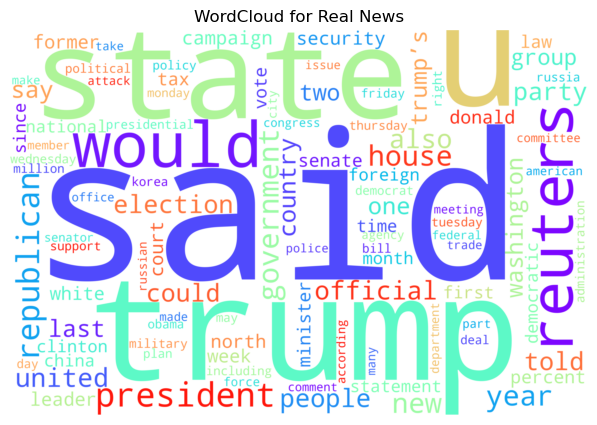

In [67]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Generate WordCloud for real news
wordcloud_real = WordCloud(width=3000, height=2000, random_state=1, background_color='white', colormap='rainbow').generate_from_frequencies(dict(top_100_real_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.title('WordCloud for Real News')
plt.axis('off')
plt.show()


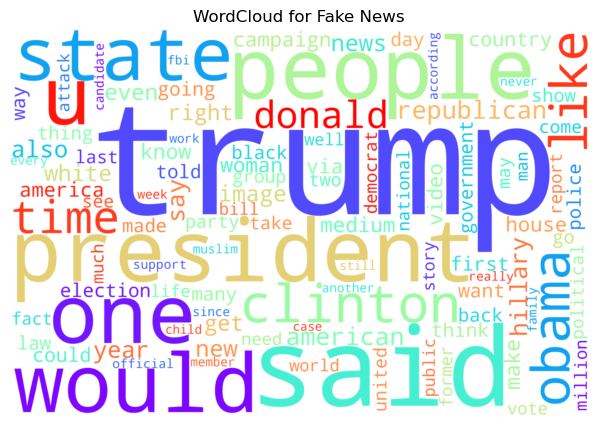

In [68]:
# Generate WordCloud for fake news
wordcloud_fake = WordCloud(width=3000, height=2000, random_state=1, background_color='white', colormap='rainbow').generate_from_frequencies(dict(top_100_fake_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('WordCloud for Fake News')
plt.axis('off')
plt.show()

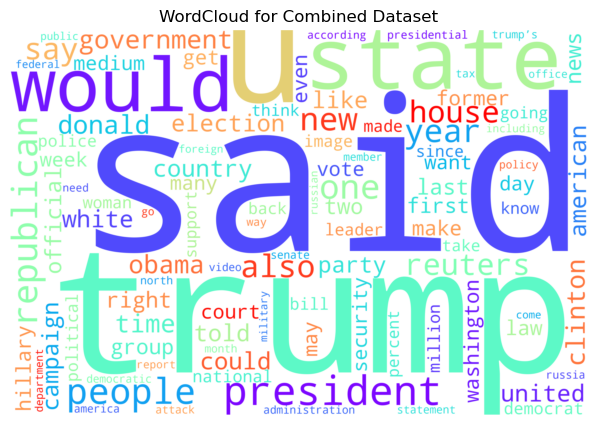

In [69]:
# Generate WordCloud for combined dataset
wordcloud_combined = WordCloud(width=3000, height=2000, random_state=1, background_color='white', colormap='rainbow').generate_from_frequencies(dict(top_100_combined_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_combined, interpolation='bilinear')
plt.title('WordCloud for Combined Dataset')
plt.axis('off')
plt.show()

### Task 2 – Building Machine Learning Model

In [71]:
df_combined.head()

,label,News
0,1,u budget fight loom republican flip fiscal scr...
1,1,u military accept transgender recruit monday p...
2,1,senior u republican senator let mr mueller job...
3,1,fbi russia probe helped australian diplomat ti...
4,1,trump want postal service charge much amazon s...


In [84]:
df_combined_shuffled = df_combined.sample(frac=1, random_state=42)

In [91]:
df_combined_shuffled.tail()

,label,News
6265,1,germany schaeuble warns trump protectionism ws...
11284,1,twentyeight arrest venezuela looting violence ...
38158,0,fbi cracked terror plot black friday may worse...
860,1,u tax plan threatens wall street bermuda idyll...
15795,1,asylum seeker refuse leave papua new guinea ca...


In [99]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import shuffle

# Shuffle the combined dataset
df_combined_shuffled = shuffle(df_combined)

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(df_combined_shuffled['News'], df_combined_shuffled['label'], test_size=0.3, random_state=42)

# Define feature extraction methods
vectorizers = [
    ('Bag-of-Words', CountVectorizer()),
    ('TF-IDF', TfidfVectorizer()),
    ('Term Frequency', CountVectorizer(binary=True))
]

# Define machine learning models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Multinomial Naive Bayes', MultinomialNB()),
    ('Support Vector Machine', SVC()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier())
]

# Train and evaluate models for each feature extraction method
for vectorizer_name, vectorizer in vectorizers:
    print(f"Vectorizer: {vectorizer_name}")
    print("=" * 50)
    for model_name, model in models:
        print(f"Model: {model_name}")
        # Extract features from text data
        X_train_features = vectorizer.fit_transform(X_train)
        X_test_features = vectorizer.transform(X_test)
        
        # Train the model
        model.fit(X_train_features, y_train)
        
        # Predict labels on the test set
        y_pred = model.predict(X_test_features)
        
        # Evaluate model performance
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        
        # Print results
        print(f"Accuracy: {accuracy:.4f}")
        print("Classification Report:")
        print(report)
        print("="*50)
    print()


Vectorizer: Bag-of-Words
Model: Logistic Regression
Accuracy: 0.9966
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7044
           1       1.00      1.00      1.00      6363

    accuracy                           1.00     13407
   macro avg       1.00      1.00      1.00     13407
weighted avg       1.00      1.00      1.00     13407

Model: Multinomial Naive Bayes
Accuracy: 0.9592
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      7044
           1       0.95      0.97      0.96      6363

    accuracy                           0.96     13407
   macro avg       0.96      0.96      0.96     13407
weighted avg       0.96      0.96      0.96     13407

Model: Support Vector Machine
Accuracy: 0.9935
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7044
    

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

# Shuffle the combined dataset
df_combined_shuffled = shuffle(df_combined)

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(df_combined_shuffled['News'], df_combined_shuffled['label'], test_size=0.3, random_state=42)

# Define feature extraction methods
vectorizers = [
    ('Bag-of-Words', CountVectorizer()),
    ('TF-IDF', TfidfVectorizer()),
    ('Term Frequency', CountVectorizer(binary=True))
]

# Define machine learning models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Multinomial Naive Bayes', MultinomialNB()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier())
]

# Train and evaluate models for each feature extraction method
for vectorizer_name, vectorizer in vectorizers:
    print(f"Vectorizer: {vectorizer_name}")
    print("=" * 50)
    for model_name, model in models:
        print(f"Model: {model_name}")
        # Extract features from text data
        X_train_features = vectorizer.fit_transform(X_train)
        X_test_features = vectorizer.transform(X_test)
        
        # Train the model
        model.fit(X_train_features, y_train)
        
        # Predict labels on the test set
        y_pred = model.predict(X_test_features)
        
        # Evaluate model performance
        report = classification_report(y_test, y_pred, output_dict=True)
        
        # Print results
        print(f"Accuracy: {report['accuracy']:.4f}")
        print(f"Precision (fake): {report['0']['precision']:.4f}")
        print(f"Precision (real): {report['1']['precision']:.4f}")
        print(f"Recall (fake): {report['0']['recall']:.4f}")
        print(f"Recall (real): {report['1']['recall']:.4f}")
        print("="*50)
    print()


Vectorizer: Bag-of-Words
Model: Logistic Regression
Accuracy: 0.9966
Precision (fake): 0.9978
Precision (real): 0.9953
Recall (fake): 0.9957
Recall (real): 0.9977
Model: Multinomial Naive Bayes
Accuracy: 0.9606
Precision (fake): 0.9676
Precision (real): 0.9532
Recall (fake): 0.9565
Recall (real): 0.9651
Model: Random Forest
Accuracy: 0.9907
Precision (fake): 0.9934
Precision (real): 0.9878
Recall (fake): 0.9887
Recall (real): 0.9928
Model: Gradient Boosting
Accuracy: 0.9952
Precision (fake): 0.9988
Precision (real): 0.9912
Recall (fake): 0.9918
Recall (real): 0.9988

Vectorizer: TF-IDF
Model: Logistic Regression
Accuracy: 0.9879
Precision (fake): 0.9890
Precision (real): 0.9868
Recall (fake): 0.9878
Recall (real): 0.9880
Model: Multinomial Naive Bayes
Accuracy: 0.9435
Precision (fake): 0.9445
Precision (real): 0.9425
Recall (fake): 0.9473
Recall (real): 0.9394
Model: Random Forest
Accuracy: 0.9900
Precision (fake): 0.9910
Precision (real): 0.9890
Recall (fake): 0.9898
Recall (real): 0.

In [104]:
df_combined_shuffled.head()

,label,News
37174,0,breaking dnc staffer may sold sensitive info “...
9390,1,sander reject deal puerto rico offer alternati...
41276,0,“hill”arious video hillary take break seizure ...
24798,0,china fire warning trump contacting taiwan vio...
9399,1,u panel probing benghazi attack report within ...


### Task 3 – Enhanced NLP Features : 

In [109]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.utils import shuffle
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# Define POS tags for filtering
noun_tags = ['NN', 'NNS', 'NNP', 'NNPS']
verb_tags = ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']
adj_noun_tags = ['JJ', 'JJR', 'JJS', 'NN', 'NNS', 'NNP', 'NNPS']

# Function to filter text based on POS tags
def pos_filter(text, pos_tags):
    tokens = word_tokenize(text)
    tagged_tokens = pos_tag(tokens)
    filtered_tokens = [token for token, tag in tagged_tokens if tag in pos_tags]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text


# Define feature extraction methods
vectorizers = [
    ('Bag-of-Words', CountVectorizer()),
    ('TF-IDF', TfidfVectorizer()),
    ('Term Frequency', CountVectorizer(binary=True))
]

# Define machine learning models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Multinomial Naive Bayes', MultinomialNB()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier())
]

# Define feature filters
feature_filters = [
    ('Nouns', noun_tags),
    ('Verbs', verb_tags),
    ('Adjectives + Nouns', adj_noun_tags)
]

# Train and evaluate models for each feature extraction method and feature filter
for vectorizer_name, vectorizer in vectorizers:
    print(f"Vectorizer: {vectorizer_name}")
    print("=" * 50)
    for feature_filter_name, pos_tags in feature_filters:
        print(f"Feature Filter: {feature_filter_name}")
        print("-" * 50)
        # Apply POS tagging and filtering
        df_combined_filtered = df_combined_shuffled['News'].apply(lambda x: pos_filter(x, pos_tags))
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(df_combined_filtered, df_combined_shuffled['label'], test_size=0.3, random_state=42)
        for model_name, model in models:
            print(f"Model: {model_name}")
            # Extract features from text data
            X_train_features = vectorizer.fit_transform(X_train)
            X_test_features = vectorizer.transform(X_test)
            # Train the model
            model.fit(X_train_features, y_train)
            # Predict labels on the test set
            y_pred = model.predict(X_test_features)
            # Evaluate model performance
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            # Print results
            print(f"Accuracy: {accuracy:.4f}")
            print(f"Precision: {precision:.4f}")
            print(f"Recall: {recall:.4f}")
            print("=" * 50)
        print()


Vectorizer: Bag-of-Words
Feature Filter: Nouns
--------------------------------------------------
Model: Logistic Regression
Accuracy: 0.9908
Precision: 0.9919
Recall: 0.9885
Model: Multinomial Naive Bayes
Accuracy: 0.9378
Precision: 0.9292
Recall: 0.9403
Model: Random Forest
Accuracy: 0.9831
Precision: 0.9798
Recall: 0.9847
Model: Gradient Boosting
Accuracy: 0.9887
Precision: 0.9922
Recall: 0.9839

Feature Filter: Verbs
--------------------------------------------------
Model: Logistic Regression


C:\Users\santh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9528
Precision: 0.9548
Recall: 0.9450
Model: Multinomial Naive Bayes
Accuracy: 0.9414
Precision: 0.9227
Recall: 0.9565
Model: Random Forest
Accuracy: 0.9502
Precision: 0.9434
Recall: 0.9521
Model: Gradient Boosting
Accuracy: 0.8880
Precision: 0.8707
Recall: 0.8965

Feature Filter: Adjectives + Nouns
--------------------------------------------------
Model: Logistic Regression
Accuracy: 0.9925
Precision: 0.9931
Recall: 0.9910
Model: Multinomial Naive Bayes
Accuracy: 0.9418
Precision: 0.9356
Recall: 0.9420
Model: Random Forest
Accuracy: 0.9864
Precision: 0.9828
Recall: 0.9887
Model: Gradient Boosting
Accuracy: 0.9883
Precision: 0.9914
Recall: 0.9838

Vectorizer: TF-IDF
Feature Filter: Nouns
--------------------------------------------------
Model: Logistic Regression
Accuracy: 0.9806
Precision: 0.9801
Recall: 0.9789
Model: Multinomial Naive Bayes
Accuracy: 0.9218
Precision: 0.9177
Recall: 0.9170
Model: Random Forest
Accuracy: 0.9811
Precision: 0.9788
Recall: 0.9813
Model: Gra

In [119]:
df_combined.head(10)


,label,News
0,1,u budget fight loom republican flip fiscal scr...
1,1,u military accept transgender recruit monday p...
2,1,senior u republican senator let mr mueller job...
3,1,fbi russia probe helped australian diplomat ti...
4,1,trump want postal service charge much amazon s...
5,1,white house congress prepare talk spending imm...
6,1,trump say russia probe fair timeline unclear n...
7,1,factbox trump twitter dec approval rating amaz...
8,1,trump twitter dec global warming following sta...
9,1,alabama official certify senatorelect jones to...


In [1]:
!pip install transformers datasets

  Obtaining dependency information for huggingface-hub<1.0,>=0.10.0 from https://files.pythonhosted.org/packages/ab/28/d4b691840d73126d4c9845f8a22dad033ac872509b6d3a0d93b456eef424/huggingface_hub-0.21.4-py3-none-any.whl.metadata
INFO: pip is looking at multiple versions of huggingface-hub to determine which version is compatible with other requirements. This could take a while.
  Obtaining dependency information for huggingface-hub<1.0,>=0.10.0 from https://files.pythonhosted.org/packages/47/8f/cf6683de320cf3873850ba48b7383db96958fe435b8e227db92119f6d867/huggingface_hub-0.21.3-py3-none-any.whl.metadata
  Obtaining dependency information for huggingface-hub<1.0,>=0.10.0 from https://files.pythonhosted.org/packages/3d/c8/c3342c97848896df5d78d18abd94c558e457a4f02feec99a79989d8c30e0/huggingface_hub-0.21.2-py3-none-any.whl.metadata
  Obtaining dependency information for huggingface-hub<1.0,>=0.10.0 from https://files.pythonhosted.org/packages/15/95/614f1a310e333e9bbf338bcc3c9378aa4c5ae7978b

In [2]:
pip install transformers[torch]

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install accelerate -U

  Obtaining dependency information for accelerate from https://files.pythonhosted.org/packages/a0/11/9bfcf765e71a2c84bbf715719ba520aeacb2ad84113f14803ff1947ddf69/accelerate-0.28.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/290.1 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/290.1 kB 1.4 MB/s eta 0:00:01
   ---------------- ----------------------- 122.9/290.1 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 290.1/290.1 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Example text sequence
text_sequence = "This is an example of a text sequence that is longer than 512 tokens. BERT can only accept input sequences up to 512 tokens."

# Maximum input length allowed by BERT
max_length = 512

# Truncate the text sequence to fit within the maximum length
truncated_sequence = text_sequence[:max_length]

# Print the truncated sequence
print("Truncated Sequence:", truncated_sequence)


Truncated Sequence: This is an example of a text sequence that is longer than 512 tokens. BERT can only accept input sequences up to 512 tokens.
